## **Detecção de faces e olhos com Classificadores Haar Cascade** 

#### **Nesta aula, iremos aprender:**
1. Como usar o Classificador Haarcascade para detectar faces.
2. Como usar o Classificador Haarcascade para detectar olhos.
3. Como usar o Classificador Haarcascade para detectar faces e olhos na webcam.


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq images.zip
!unzip -qq haarcascades.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


## **Detecção de rosto simples usando classificadores Haarcascade**

### **Primeiramente, O que é detecção de objetos?**

![](https://miro.medium.com/max/739/1*zlWrCk1hBBFRXa5t84lmHQ.jpeg)

**Object Detection** is the ability to detect and classify individual objects in an image and draw a bounding box over the object's area. 

## **HAAR Cascade Classifiers**

Developed by Viola and Jones in 2001.

Um método de detecção de objetos que utiliza uma série de classificadores (cascata) para identificar objetos em uma imagem. Eles são treinados para identificar um tipo de objeto, porém, podemos usar vários deles em paralelo, por exemplo. detectando olhos e rostos juntos. Os classificadores HAAR são treinados usando muitas imagens positivas (ou seja, imagens com o objeto presente) e imagens negativas (ou seja, imagens sem o objeto presente).
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/haar.png)

## Conceito geral:

Os classificadores Haar Cascade utilizam um modelo de classificação binária treinado com imagens positivas (que contêm o objeto de interesse) e negativas (que não contêm o objeto). Durante a detecção, o classificador decide se uma região da imagem contém ou não o objeto de interesse.

Definir as features de Haar

- São características simples que descrevem como a intensidade dos pixels varia em diferentes regiões da imagem.
- Cada feature de Haar compara a soma das intensidades de duas ou mais regiões retangulares adjacentes.
- As features são representadas como retângulos brancos e pretos.
- O valor de uma feature é a diferença entre a soma dos pixels na região branca e a soma dos pixels na região preta.

Cálculo Eficiente: Integral Image

- Para acelerar o cálculo das features, o método utiliza a Imagem Integral, onde cada pixel armazena a soma de todos os pixels acima e à esquerda dele.
- Com a Imagem Integral, a soma de qualquer região retangular é calculada em tempo constante, independentemente do tamanho.

Adaboost para Seleção de Features

- O conjunto de features de Haar pode ser muito grande, mas nem todas são úteis para detectar o objeto de interesse.
- O Adaboost é utilizado para selecionar as features mais relevantes
- Criar uma combinação ponderada dessas features para formar classificadores mais robustos

Classificador em Cascata

- Os classificadores Haar Cascade são organizados em uma cascata de estágios
- Cada estágio contém um classificador simples que decide se uma região da imagem deve ser descartada ou analisada mais profundamente.
- A ideia é reduzir o número de regiões processadas rapidamente, descartando regiões negativas com classificadores simples nos estágios iniciais.

<>:25: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:25: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13104\2302273737.py:25: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


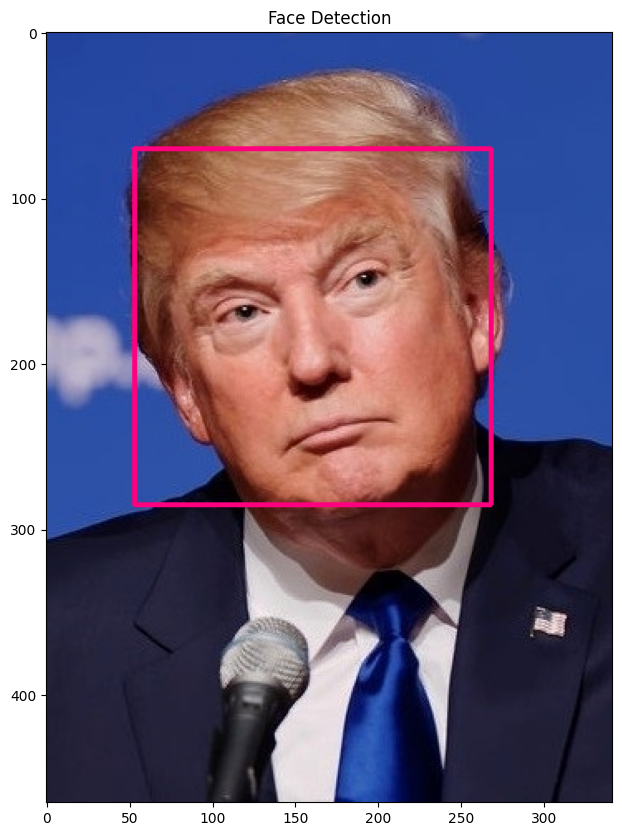

In [2]:
# Usamos a função do OpenCV e passamos o arquivo xml.
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Nosso classificador retorna o ROI (Região de Interesse) do rosto detectado como uma tupla
# Ele armazena a coordenada superior esquerda e as coordenadas inferior direita
"""
Parameters
    image -	Matrix of the type CV_8U containing an image where objects are detected.
    objects	- Vetor de retângulos onde cada retângulo contém o objeto detectado, os retângulos podem estar parcialmente fora da imagem original.
    scaleFactor	- Parâmetro que especifica quanto o tamanho da imagem é reduzido em cada escala de imagem.
    minNeighbors -	Parâmetro que especifica quantos vizinhos cada retângulo candidato deve ter para mantê-lo.
    flags	- Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade.
    minSize	- Minimum possible object size. Objects smaller than that are ignored.
    maxSize	- Maximum possible object size. Objects larger than that are ignored. If maxSize == minSize model is evaluated on single scale.

"""

faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("Sem faces detectadas")

# We iterate through our faces array and draw a rectangle
# over each face in face

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)

imshow('Face Detection', image)

In [5]:
import time

# Carregar o classificador Haar Cascade pré-treinado
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Carregar a imagem
image_path = 'images/Trump.jpg'  # Substitua pelo caminho da sua imagem
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Configuração do vídeo de saída
output_file = "processo_haarcascade.mp4"
frame_height, frame_width = img.shape[:2]
fps = 10  # Quadros por segundo
out = cv2.VideoWriter(output_file, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

# Variáveis de configuração do processo
scale_factor = 1.1
min_neighbors = 5
min_size = (200, 200)
window_step = 20  # Passo das janelas deslizantes

# Copiar a imagem para edição
img_copy = img.copy()

# Função para desenhar um filtro Haar em uma janela
def draw_haar_feature(image, x, y, w, h, aux):
    if aux == 1:
        # Filtros Haar horizontais
        half_h = h // 2
        cv2.rectangle(image, (x, y), (x + w, y + half_h), (255, 255, 255), -1)  # Branco (superior)
        cv2.rectangle(image, (x, y + half_h), (x + w, y + h), (0, 0, 0), -1)  # Preto (inferior)
    if aux == 2:
        # Filtros Haar verticais
        half_w = w // 2
        cv2.rectangle(image, (x, y), (x + half_w, y + h), (255, 255, 255), -1)  # Branco (esquerda)
        cv2.rectangle(image, (x + half_w, y), (x + w, y + h), (0, 0, 0), -1)  # Preto (direita)
    
    if aux == 3:
        # Filtro Haar diagonal (dividido em duas partes)
        cv2.rectangle(image, (x, y), (x + w, y + h // 2), (255, 255, 255), -1)  # Branco (superior)
        cv2.rectangle(image, (x, y + h // 2), (x + w, y + h), (0, 0, 0), -1)  # Preto (inferior)
    
    if aux == 4:
        # Filtro Haar em duas divisões horizontais e verticais
        cv2.rectangle(image, (x, y), (x + w // 2, y + h // 2), (255, 255, 255), -1)  # Branco (superior esquerda)
        cv2.rectangle(image, (x + w // 2, y), (x + w, y + h // 2), (0, 0, 0), -1)  # Preto (superior direita)
        cv2.rectangle(image, (x, y + h // 2), (x + w // 2, y + h), (0, 0, 0), -1)  # Preto (inferior esquerda)
        cv2.rectangle(image, (x + w // 2, y + h // 2), (x + w, y + h), (255, 255, 255), -1)  # Branco (inferior direita)



for scale in range(1, 2):  # Itera sobre diferentes escalas (neste caso, apenas uma escala)
    # Calcula o multiplicador de escala baseado no fator de escala elevado ao valor de 'scale'.
    scale_multiplier = scale_factor ** scale
    # Determina o tamanho da janela escalada. Multiplica cada dimensão mínima (largura e altura) pelo multiplicador de escala.
    # O resultado é convertido para inteiros, pois o tamanho da janela geralmente precisa ser representado como valores inteiros.   
    window_size = (int(min_size[0] * scale_multiplier), int(min_size[1] * scale_multiplier))
    # Copiar a imagem para edição
    img_copy = img.copy()
    lista = []  # Lista para armazenar as janelas classificadas como positivas

    # Itera verticalmente pela imagem com um passo definido (window_step)
    for y in range(0, gray.shape[0] - window_size[1], window_step):  
        # Itera horizontalmente pela imagem com um passo definido (window_step)
        for x in range(0, gray.shape[1] - window_size[0], window_step):  
            # Desenha retângulos para todas as janelas positivas detectadas anteriormente
            for item in lista:
                cv2.rectangle(img_copy, item[0], item[1], (255, 0, 0), 2)

            # Desenhar a janela deslizante atual
            cv2.rectangle(img_copy, (x, y), (x + window_size[0], y + window_size[1]), (0, 255, 0), 2)
            
            i = 0
            while i != 5:  # Itera para desenhar e visualizar diferentes filtros Haar
                # Desenhar um filtro Haar dentro da janela atual
                draw_haar_feature(img_copy, x, y, window_size[0], window_size[1], i)
                # Salvar o frame no vídeo
                out.write(img_copy)
                i += 1
            
            # Extrai a subimagem correspondente à janela atual
            sub_image = gray[y:y + window_size[1], x:x + window_size[0]]
            # Aplica o Haar Cascade na subimagem para detectar objetos (como rostos)
            detections = face_cascade.detectMultiScale(sub_image, scaleFactor=1.1, minNeighbors=min_neighbors)
            print(detections)  # Exibe as coordenadas das detecções no console

            # Desenha retângulos para cada detecção e armazena as coordenadas na lista
            for (dx, dy, dw, dh) in detections:
                cv2.rectangle(img_copy, (x + dx, y + dy), (x + dx + dw, y + dy + dh), (255, 0, 0), 2)
                lista.append([(x + dx, y + dy), (x + dx + dw, y + dy + dh)])
                
            # Salvar o frame atualizado no vídeo
            out.write(img_copy)
            # Exibe o frame processado em uma janela
            cv2.imshow('fram', img_copy)
            cv2.waitKey(1) & 0xFF == ord('0')  # Aguarda uma tecla (não funcional no contexto atual)

            # Reseta a imagem para evitar sobreposição de alterações na próxima iteração
            img_copy = img.copy()

# Liberar o vídeo e janelas
out.release()
cv2.destroyAllWindows()

print(f"Processo salvo em {output_file}")

()
[[72 55 56 56]]
()
[[32 55 55 55]]
()
()
()
()
[[74 36 52 52]]
[[52 35 55 55]]
[[32 35 55 55]]
()
()
()
()
[[73 16 54 54]]
()
()
[[13 16 52 52]]
()
()
()
()
[[ 26  24 182 182]]
[[ 11  27 178 178]]
()
()
()
()
()
[[ 28   6 180 180]]
[[  8   5 185 185]]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
Processo salvo em processo_haarcascade.mp4


## **Simple Eye & Face Detection using Haarcascade Classifiers**

<>:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13104\3113749080.py:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


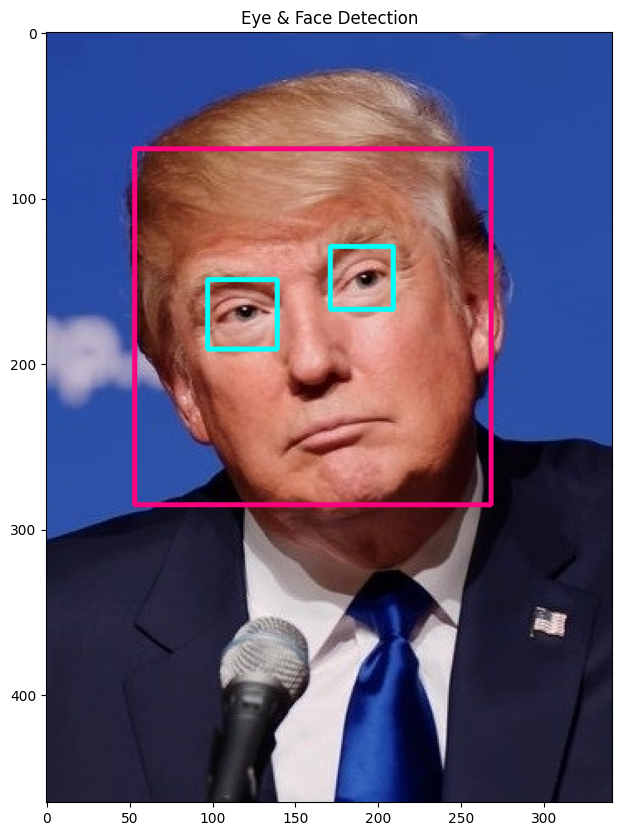

In [6]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')
 
img = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.2, 3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)

## **Using Colab's Code Snippets let's access the webcam for an input**

Note: Requires your computer to have a webcam

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

ModuleNotFoundError: No module named 'google'

In [28]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

name 'take_photo' is not defined


<>:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_15516\733884082.py:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


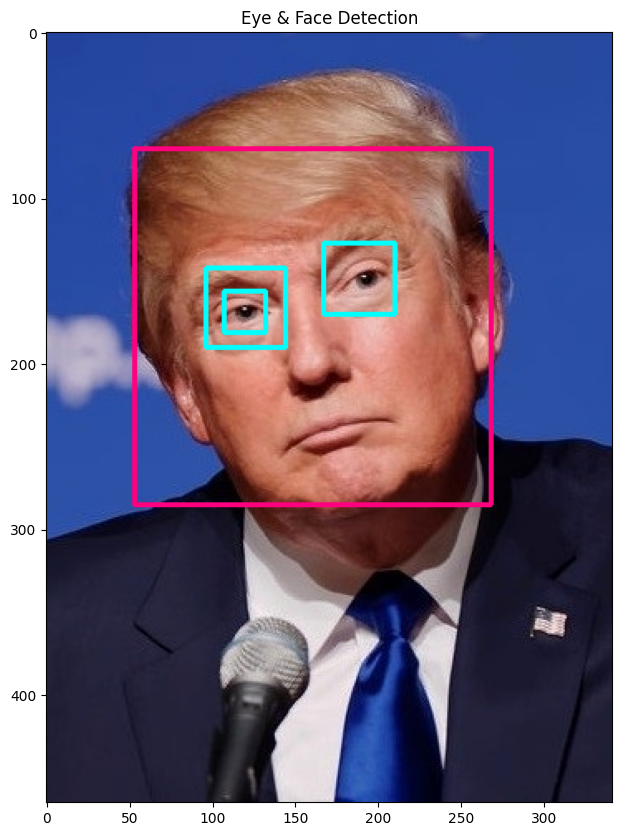

In [6]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')
 
img = cv2.imread('Images/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)

### **Bonus Code - Usando sua webcam para detecção de face e olhos**

Só funciona na sua máquina e não no colab.

In [8]:
import cv2
import numpy as np
import time

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

camera = cv2.VideoCapture(0)
time.sleep(2)
while True:

    conectado, imagem = camera.read()
    gray = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)
    
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        print("")
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(imagem,(x,y),(x+w,y+h),(255,0,0),2)
        eyes = eye_classifier.detectMultiScale(gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(imagem,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            

    
    cv2.imshow("Our Face Extractor", imagem)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
camera.release()
cv2.destroyAllWindows()      

<>:16: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13104\4012322208.py:16: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
